## 尝试使用NumPy和Pandas处理华东地区18~22年GDP数据并使用sklearn分析

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import random
%matplotlib inline

### 导入ECGPA.csv
使用pandas框架的read_csv导入数据，并输出所有属于上海市的数据

In [7]:
gdp_data=pd.read_csv("./data/ECGDP.csv")
sample=gdp_data[gdp_data["所属城市名称_CityNm"].str.fullmatch("上海市")]
print(sample.to_markdown())

|      | 截止日期_EndDt   |   区县代码_CountyCd | 区县名称_CountyNm   | 所属城市名称_CityNm   | 所属省份名称_ProvNm   |   地区生产总值(亿元)_RegGDP |   地区生产总值：第一产业(亿元)_RegGDPPrim |   地区生产总值：第一产业增长率(%)_RegGDPPrimGrow |   地区生产总值：第二产业(亿元)_RegGDPSecd |   地区生产总值：第二产业增长率(%)_RegGDPSecdGrow |   地区生产总值：第三产业(亿元)_RegGDPTer |   地区生产总值：第三产业增长率(%)_RegGDPTerGrow |   地区生产总值增长率(%)_RegGDPGrow |   人均地区生产总值(元)_RegGDPCap |   Unnamed: 14 |
|-----:|:-----------------|--------------------:|:--------------------|:----------------------|:----------------------|----------------------------:|------------------------------------------:|-------------------------------------------------:|------------------------------------------:|-------------------------------------------------:|-----------------------------------------:|------------------------------------------------:|-----------------------------------:|---------------------------------:|--------------:|
|    0 | 2018-12-31       |              310101 | 黄浦区              | 上海市                |

### 使用matplotlib绘制折线图
使用matplotlib绘制折线图体现近几年变化数据
这其中，我们使用mpl.rcParams设置全局的字体属性，在设置标题等操作时，可以传入`fontsize` `color`等属性，来设置局部的字体属性
由于闸北区等部分区域被撤销，因此使用hasnans来删除这些（否则会引发异常）
使用plot绘制折线时可以用label来指定图例标题，ax的legend中可以使用loc属性来指定位置（值为图的百分比，且指定的为图例的左下角的位置坐标）

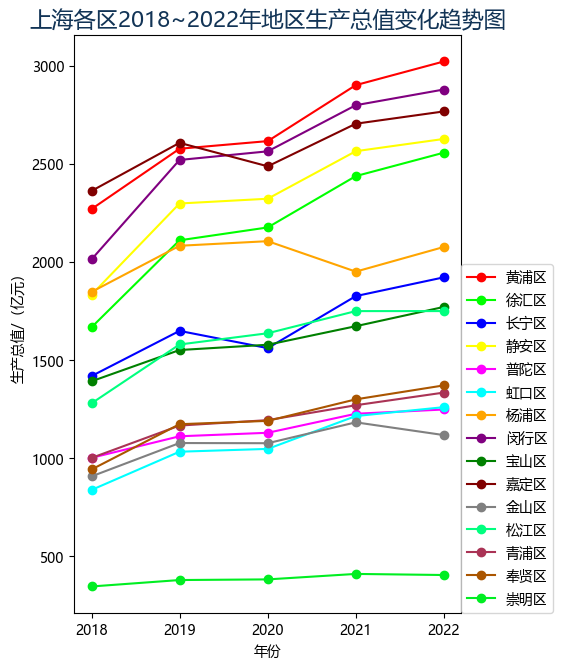

In [8]:
def randomColor():
    color='#'
    hexDigits=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    for i in range(0,6):
        color+=hexDigits[random.randint(0,15)]
    return color

random_color_list = [
    "#FF0000", 
    "#00FF00", 
    "#0000FF", 
    "#FFFF00", 
    "#FF00FF", 
    "#00FFFF", 
    "#FFA500", 
    "#800080", 
    "#008000", 
    "#800000", 
    "#808080", 
    "#00FF7F",
    "#AA3355",
    "#AA5500",
    "#00EE22",
    "#6600AA",
    "#ABFF55"
]
fig=plt.figure(figsize=(5,7.5))
ax=fig.add_subplot(111)
mpl.rcParams['font.family']=['Microsoft Yahei']
mpl.rcParams['axes.unicode_minus']=False 
ax.set_title("上海各区2018~2022年地区生产总值变化趋势图",fontsize=16,color="#123456")
ax.set_xlabel("年份")
ax.set_ylabel("生产总值/（亿元）")
ax.xaxis.set_major_formatter(mdate.DateFormatter("%Y"))
ax.xaxis.set_major_locator(mdate.YearLocator(1,12,31))
enum_name=sample["区县名称_CountyNm"].unique()

exclude=["浦东新区"] #太高了输出不好看

color_list_index=0
for name in enum_name:
    region_data=sample[sample["区县名称_CountyNm"].str.fullmatch(name)]
    if not region_data["地区生产总值(亿元)_RegGDP"].hasnans and name not in exclude:
        ax.plot(pd.date_range(start="2018",end="2023",freq="YE"),region_data["地区生产总值(亿元)_RegGDP"],label=name,color=random_color_list[color_list_index],marker='o')
        color_list_index+=1
ax.legend(loc=(1,0))
plt.show()

### 使用matplotlib绘制饼图
Axes.pie函数可以绘制饼图,Axes.pie中各个参数的意义在文档中有详细说明。注意figsize的参数意义是先长后宽，add_subplot的参数意义是先宽后长

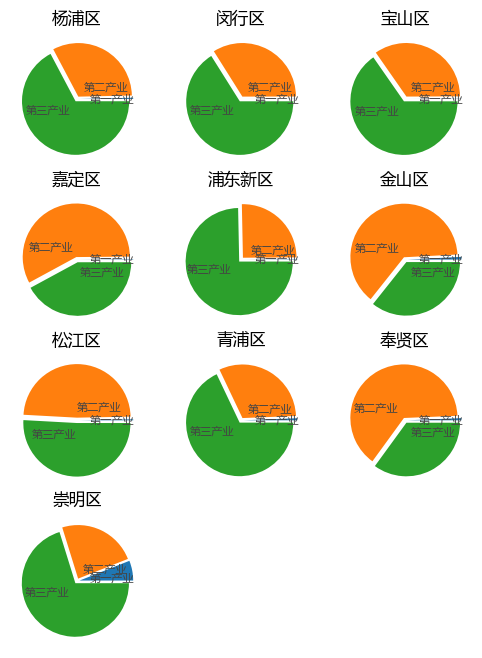

In [9]:
labels=["第一产业","第二产业","第三产业"]
sample_pie_chart=sample.loc[:,["截止日期_EndDt","区县名称_CountyNm","所属城市名称_CityNm","地区生产总值：第一产业(亿元)_RegGDPPrim","地区生产总值：第二产业(亿元)_RegGDPSecd","地区生产总值：第三产业(亿元)_RegGDPTer"]]
sample_pie_chart=sample_pie_chart[sample_pie_chart["截止日期_EndDt"].str.fullmatch("2022-12-31")]
sample_pie_chart.dropna(axis=0,inplace=True,how='any')
enum_name=sample_pie_chart["区县名称_CountyNm"]
fig_pie_chart=plt.figure(figsize=(6,8))
idx=1
for name in enum_name:
    current_ax=fig_pie_chart.add_subplot(4,3,idx)
    current_ax.set_title(name)
    current_ax.xaxis.set_visible(False)
    current_ax.yaxis.set_visible(False)
    current_data=sample_pie_chart[sample_pie_chart["区县名称_CountyNm"].str.fullmatch(name)]
    size=current_data.loc[:,["地区生产总值：第一产业(亿元)_RegGDPPrim","地区生产总值：第二产业(亿元)_RegGDPSecd","地区生产总值：第三产业(亿元)_RegGDPTer"]].squeeze()
    current_ax.pie(size,labels=labels,labeldistance=0.2,explode=(0.05,0.05,0.05),textprops={"size":8,"color":"#444444"})
    idx+=1
plt.show()

### 将柱状图和折线图绘制在同一个坐标轴中
尝试将两个统计图绘制在同一幅图中

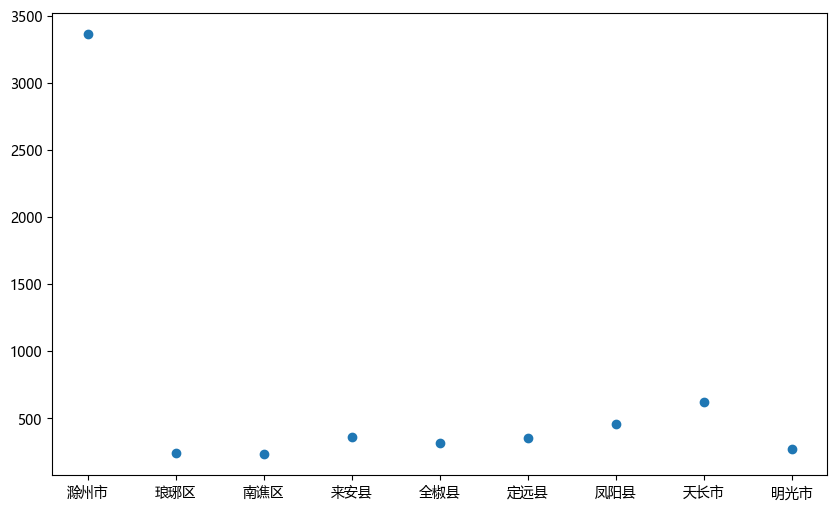

In [10]:
sample_chuzhou=gdp_data[np.logical_and(gdp_data["所属城市名称_CityNm"].str.fullmatch("滁州市"),gdp_data["截止日期_EndDt"].str.fullmatch("2021-12-31"))]
# sample_chuzhou=sample_chuzhou.loc[:,["区县名称_CountyNm","地区生产总值(亿元)_RegGDP","地区生产总值：第一产业(亿元)_RegGDPPrim","地区生产总值：第二产业(亿元)_RegGDPSecd","地区生产总值：第三产业(亿元)_RegGDPTer"]]
# sample_chuzhou.dropna(how='any',inplace=True)
# sample_chuzhou.groupby("区县名称_CountyNm")
# fig_chuzhou=plt.figure(figsize=(6,4))
# ax_chuzhou=fig_chuzhou.add_subplot(111)
sample_chuzhou=sample_chuzhou.loc[:,["区县名称_CountyNm","地区生产总值(亿元)_RegGDP"]]
sample_chuzhou.dropna(how='any',inplace=True)
# 绘制散点图
fig_chuzhou = plt.figure(figsize=(10, 6))
ax_chuzhou = fig_chuzhou.add_subplot(111)

# 使用区县名称作为 x 轴，地区生产总值作为 y 轴
ax_chuzhou.scatter(sample_chuzhou["区县名称_CountyNm"], sample_chuzhou["地区生产总值(亿元)_RegGDP"])

